# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | la foa
Processing Record 6 of Set 1 | hondo
Processing Record 7 of Set 1 | stephenville
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | yamba
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | sandnessjoen
Processing Record 13 of Set 1 | portland
Processing Record 14 of Set 1 | kitui
Processing Record 15 of Set 1 | rudbar
Processing Record 16 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 17 of Set 1 | maile
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | hamilton
Processing Record 

Processing Record 39 of Set 4 | pisco
Processing Record 40 of Set 4 | muang phonsavan
Processing Record 41 of Set 4 | oruro
Processing Record 42 of Set 4 | la souterraine
Processing Record 43 of Set 4 | dudinka
Processing Record 44 of Set 4 | lubango
Processing Record 45 of Set 4 | santa cruz
Processing Record 46 of Set 4 | mossel bay
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | kasongo-lunda
Processing Record 49 of Set 4 | datong
Processing Record 0 of Set 5 | oranjemund
Processing Record 1 of Set 5 | port saint john's
Processing Record 2 of Set 5 | korsakov
Processing Record 3 of Set 5 | johnstone
Processing Record 4 of Set 5 | kalmunai
Processing Record 5 of Set 5 | lae
Processing Record 6 of Set 5 | kharp
Processing Record 7 of Set 5 | mata-utu
Processing Record 8 of Set 5 | al jawf
Processing Record 9 of Set 5 | san antonio de pale
Processing Record 10 of Set 5 | novyy urengoy
Processing Record 11 of Set 5 | klaksvik
Processing Record 12 of Set 5 | vi

Processing Record 35 of Set 8 | whakatane
Processing Record 36 of Set 8 | nova olinda do norte
Processing Record 37 of Set 8 | mokhsogollokh
Processing Record 38 of Set 8 | kavaratti
Processing Record 39 of Set 8 | sola
Processing Record 40 of Set 8 | prainha
Processing Record 41 of Set 8 | flin flon
Processing Record 42 of Set 8 | kiunga
Processing Record 43 of Set 8 | port douglas
Processing Record 44 of Set 8 | qarauyl
Processing Record 45 of Set 8 | kendari
Processing Record 46 of Set 8 | pokhara
Processing Record 47 of Set 8 | dryden
Processing Record 48 of Set 8 | sechura
Processing Record 49 of Set 8 | marsh harbour
Processing Record 0 of Set 9 | cold lake
Processing Record 1 of Set 9 | shiyan
Processing Record 2 of Set 9 | monts
Processing Record 3 of Set 9 | st. john's
Processing Record 4 of Set 9 | miyako
Processing Record 5 of Set 9 | altay
Processing Record 6 of Set 9 | yaren
Processing Record 7 of Set 9 | bosobolo
Processing Record 8 of Set 9 | saratamata
City not found. S

Processing Record 28 of Set 12 | columbus
Processing Record 29 of Set 12 | grand-popo
Processing Record 30 of Set 12 | saudarkrokur
Processing Record 31 of Set 12 | pervomayskoye
Processing Record 32 of Set 12 | an nuhud
Processing Record 33 of Set 12 | belvedere marittimo
Processing Record 34 of Set 12 | kristiansund
Processing Record 35 of Set 12 | komatsu
Processing Record 36 of Set 12 | brisas de zicatela
Processing Record 37 of Set 12 | sao paulo de olivenca
Processing Record 38 of Set 12 | billings
Processing Record 39 of Set 12 | mili
Processing Record 40 of Set 12 | mangrol
Processing Record 41 of Set 12 | namalenga
Processing Record 42 of Set 12 | sang-e charak
Processing Record 43 of Set 12 | lycksele
Processing Record 44 of Set 12 | el granada
Processing Record 45 of Set 12 | qobustan
Processing Record 46 of Set 12 | ofunato
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,19.89,83,33,0.89,US,1691636402
1,atafu village,-8.5421,-172.5159,28.01,79,33,6.40,TK,1691636696
2,port-aux-francais,-49.3500,70.2167,3.52,87,97,10.29,TF,1691636696
3,blackmans bay,-43.0167,147.3167,16.07,67,85,4.17,AU,1691636696
4,la foa,-21.7108,165.8276,18.60,62,83,7.66,NC,1691636696


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,19.89,83,33,0.89,US,1691636402
1,atafu village,-8.5421,-172.5159,28.01,79,33,6.40,TK,1691636696
2,port-aux-francais,-49.3500,70.2167,3.52,87,97,10.29,TF,1691636696
3,blackmans bay,-43.0167,147.3167,16.07,67,85,4.17,AU,1691636696
4,la foa,-21.7108,165.8276,18.60,62,83,7.66,NC,1691636696


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

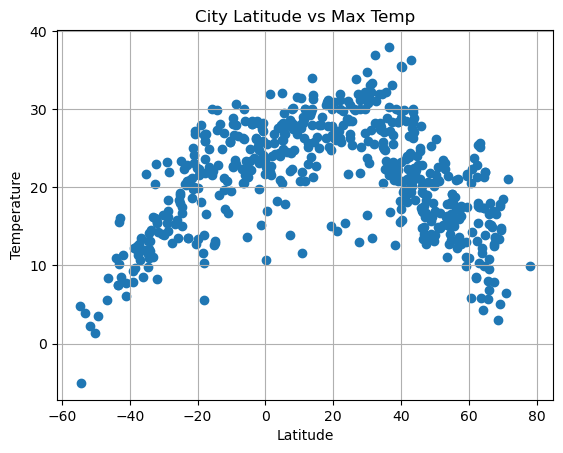

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
lat_values = city_data_df['Lat']
temp_values = city_data_df['Max Temp']
plt.scatter(lat_values,temp_values)

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f"City Latitude vs Max Temp")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

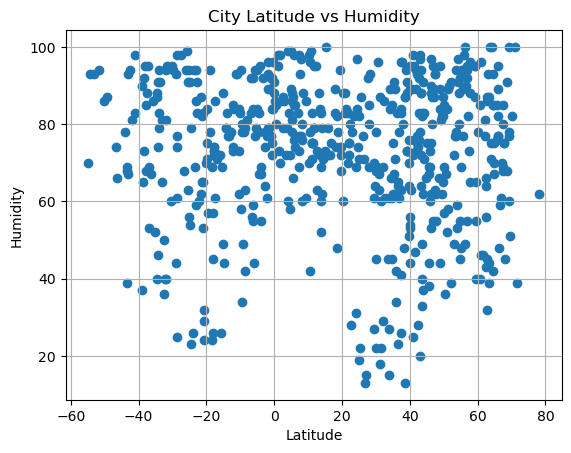

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_values = city_data_df['Lat']
hum_values = city_data_df['Humidity']
plt.scatter(lat_values,hum_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"City Latitude vs Humidity")
plt.grid()
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

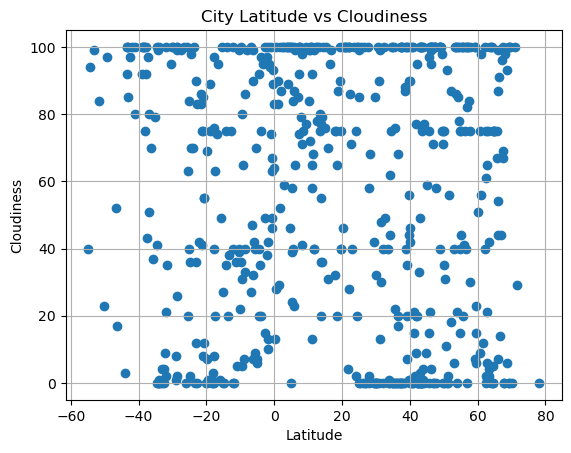

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_values = city_data_df['Lat']
cloud_values = city_data_df['Cloudiness']
plt.scatter(lat_values,cloud_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs Cloudiness")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

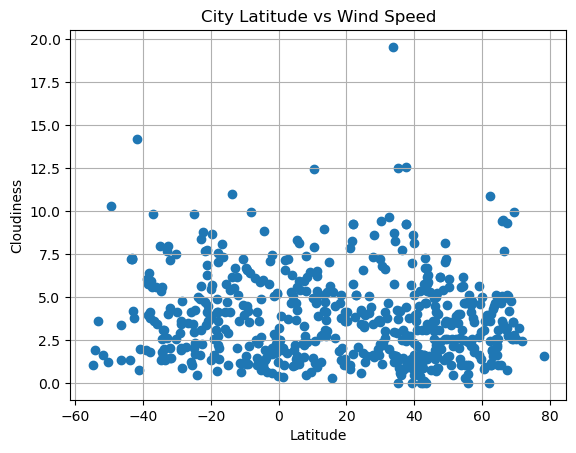

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_values = city_data_df['Lat']
wind_values = city_data_df['Wind Speed']
plt.scatter(lat_values,wind_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs Wind Speed")
plt.grid()
plt.show()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


NameError: name 'stats' is not defined

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,19.89,83,33,0.89,US,1691636402
5,hondo,32.4500,130.2000,28.23,86,100,9.65,JP,1691636471
6,stephenville,32.2207,-98.2023,37.00,29,40,4.63,US,1691636239
7,qaqortoq,60.7167,-46.0333,5.81,85,9,0.81,GL,1691636696
10,tiksi,71.6872,128.8694,21.07,39,29,2.46,RU,1691636682


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"])<= 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,28.01,79,33,6.40,TK,1691636696
2,port-aux-francais,-49.3500,70.2167,3.52,87,97,10.29,TF,1691636696
3,blackmans bay,-43.0167,147.3167,16.07,67,85,4.17,AU,1691636696
4,la foa,-21.7108,165.8276,18.60,62,83,7.66,NC,1691636696
8,adamstown,-25.0660,-130.1015,19.33,56,84,9.81,PN,1691636686


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.21x + 29.8
The r-squared is: -0.6059408798258832


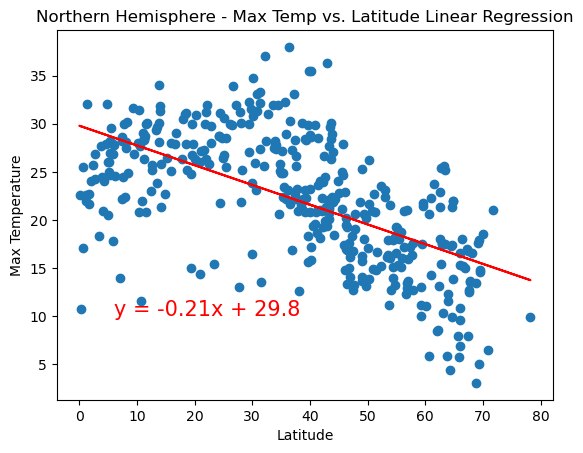

In [15]:
# Linear regression on Northern Hemisphere
lat_values = northern_hemi_df["Lat"]
temp_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, temp_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(lat_values,temp_values)
plt.plot(lat_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

Regression line equation is: y = 0.4x + 27.3


Text(0.5, 1.0, 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

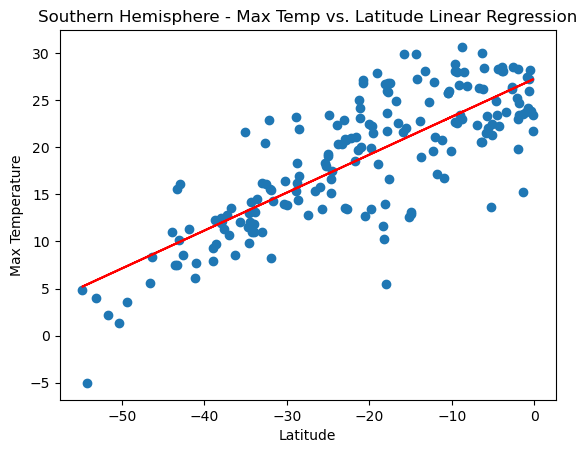

In [16]:
# Linear regression on Southern Hemisphere
lat_values = southern_hemi_df["Lat"]
temp_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, temp_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(lat_values,temp_values)
plt.plot(lat_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

**Discussion about the linear relationship:** The closer you are to the Equator the higher the temperature.  

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.09x + 75.84
The r-squared is: -0.09250030093437682


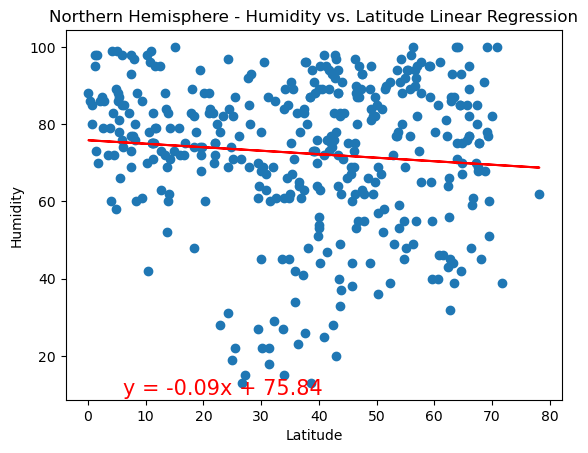

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
lat_values = northern_hemi_df["Lat"]
humidity_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, humidity_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(lat_values,humidity_values)
plt.plot(lat_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

Regression line equation is: y = 0.01x + 73.59
The r-squared is: 0.009173498137194272


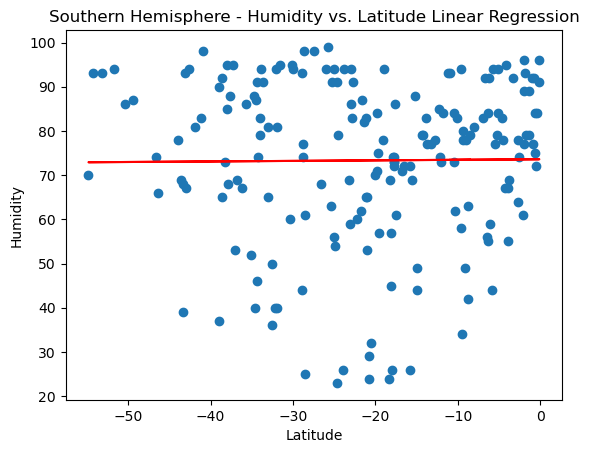

In [19]:
# Southern Hemisphere
lat_values = southern_hemi_df["Lat"]
humidity_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, humidity_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(lat_values,humidity_values)
plt.plot(lat_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** Regardless of proximity to the Equator, both Hemispheres have roughly similar Humidity Percentages.  

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.34x + 69.19
The r-squared is: -0.17051839847918016


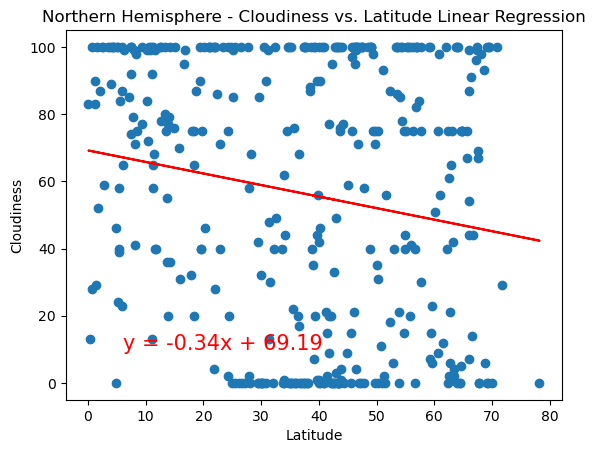

In [20]:
# Northern Hemisphere
lat_values = northern_hemi_df["Lat"]
cloud_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, cloud_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(lat_values,cloud_values)
plt.plot(lat_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

Regression line equation is: y = -0.31x + 47.05
The r-squared is: -0.11354584539732385


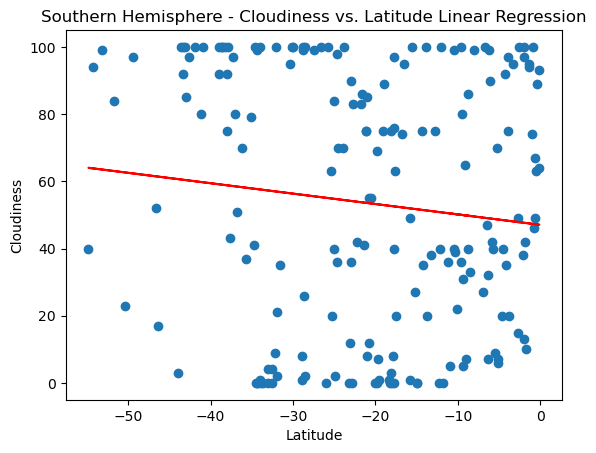

In [21]:
# Southern Hemisphere
lat_values = southern_hemi_df["Lat"]
cloud_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, cloud_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(lat_values,cloud_values)
plt.plot(lat_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The Northern Hemispehere is cloudier than the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.01x + 4.03
The r-squared is: -0.08717602145034971


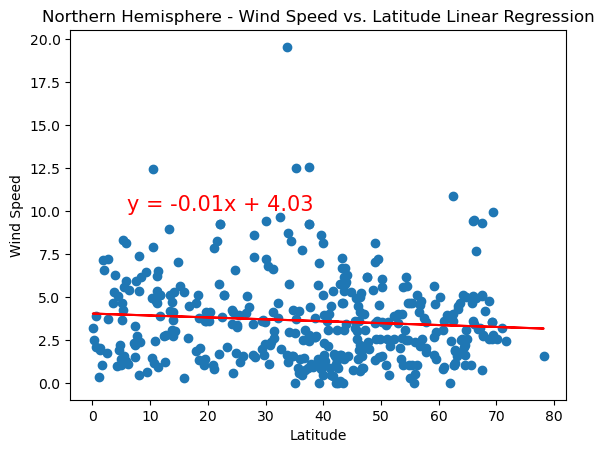

In [22]:
# Northern Hemisphere
lat_values = northern_hemi_df["Lat"]
wind_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, wind_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(lat_values,wind_values)
plt.plot(lat_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

Regression line equation is: y = -0.02x + 3.49
The r-squared is: -0.11690950972862713


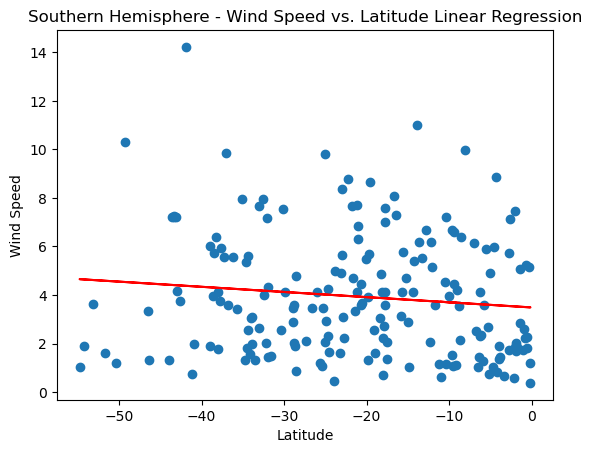

In [23]:
# Southern Hemisphere
lat_values = southern_hemi_df["Lat"]
wind_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_values, wind_values)
regress_values = lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(lat_values,wind_values)
plt.plot(lat_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

**Discussion about the linear relationship:  Regardless of Proximity to the Equator, wind speed is realatively the same